# Emotion Classification Using CNN: Exploring Deep Learning Techniques

This notebook introduces **Convolutional Neural Networks (CNNs)** as a deep learning approach for emotion classification. By leveraging the **augmented dataset**, we aim to improve classification performance compared to classical machine learning methods. CNNs are particularly effective in capturing spatial relationships and local patterns in textual data, making them suitable for this task.

### Key Highlights:

1. **Dataset Preparation:**
   - The dataset is split into **training** (60%), **validation** (20%), and **testing** (20%) subsets.
   - Textual data is tokenized and converted into numerical sequences using a **Tokenizer**.
   - Sequences are padded to ensure uniform length across all inputs.

2. **CNN Architecture:**
   - Embedding Layer: Maps words to dense vector representations.
   - Convolutional Layer: Extracts local patterns from the text.
   - Global Max Pooling: Reduces dimensionality while retaining the most significant features.
   - Fully Connected Layer: Processes extracted features to make predictions.
   - Dropout Layer: Prevents overfitting by randomly dropping units during training.
   - Output Layer: Predicts probabilities for multiple emotion classes using the **softmax activation**.

3. **Training Process:**
   - The model is compiled with the **Adam optimizer** and **categorical crossentropy loss**.
   - An **early stopping callback** monitors validation loss to prevent overfitting.
   - Training history is plotted to visualize performance over epochs.

4. **Performance Evaluation:**
   - The model is evaluated on the test set, with accuracy and a **confusion matrix** providing insights into performance.
   - The trained model is saved for future use.

This notebook lays the groundwork for applying deep learning techniques to emotion classification, serving as a starting point for future enhancements such as hyperparameter tuning and experimentation with advanced architectures like LSTMs or transformers.


# Number of Epochs = 10

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2218/2218 ━━━━━━━━━━━━━━━━━━━━ 52s 23ms/step - accuracy: 0.3917 - loss: 1.7743 - val_accuracy: 0.6732 - val_loss: 0.9952
Epoch 2/10
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.7633 - loss: 0.7431 - val_accuracy: 0.7533 - val_loss: 0.7618
Epoch 3/10
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.8725 - loss: 0.4042 - val_accuracy: 0.7740 - val_loss: 0.7230
Epoch 4/10
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 50s 22ms/step - accuracy: 0.9206 - loss: 0.2490 - val_accuracy: 0.7886 - val_loss: 0.7547
Epoch 5/10
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 48s 22ms/step - accuracy: 0.9439 - loss: 0.1744 - val_accuracy: 0.7848 - val_loss: 0.8466
Epoch 6/10
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.9545 - loss: 0.1419 - val_accuracy: 0.7905 - val_loss: 0.9159
Epoch 7/10
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.9631 - loss: 0.1141 - val_accuracy: 0.7912 - val_loss: 0.9504
Epoch 8/10
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.9671 - loss: 0.09


Test Accuracy: 0.7943


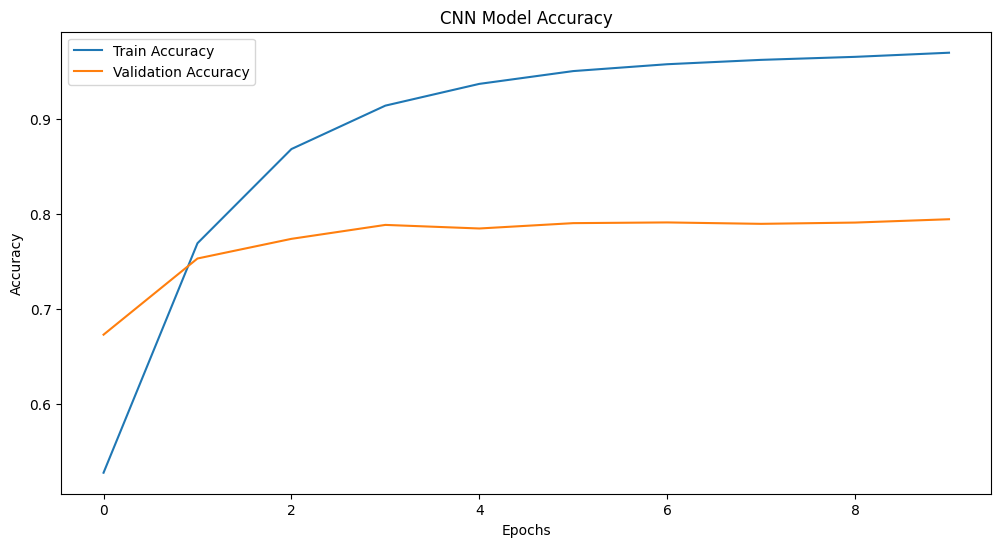

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Load the augmented dataset
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Split the dataset into features and labels
X = df['cleaned_text']
y = df['EMOTION']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert emotion labels to integers
y_categorical = to_categorical(y_encoded)  # One-hot encode the labels for multi-class classification

# Split into train, validation, and test sets (60%-20%-20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Vocabulary size of 10,000
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build the CNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))  # Embedding layer
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  # Convolutional layer
model.add(GlobalMaxPooling1D())  # Global Max Pooling layer
model.add(Dense(128, activation='relu'))  # Fully connected layer
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_val_padded, y_val),
    epochs=10,  # Adjust number of epochs based on dataset size and model performance
    batch_size=64,  # Adjust batch size if running on limited hardware
    verbose=1
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Save the model
model.save('cnn_emotion_model.h5')  # Save the trained model for reuse

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1479/1479 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step


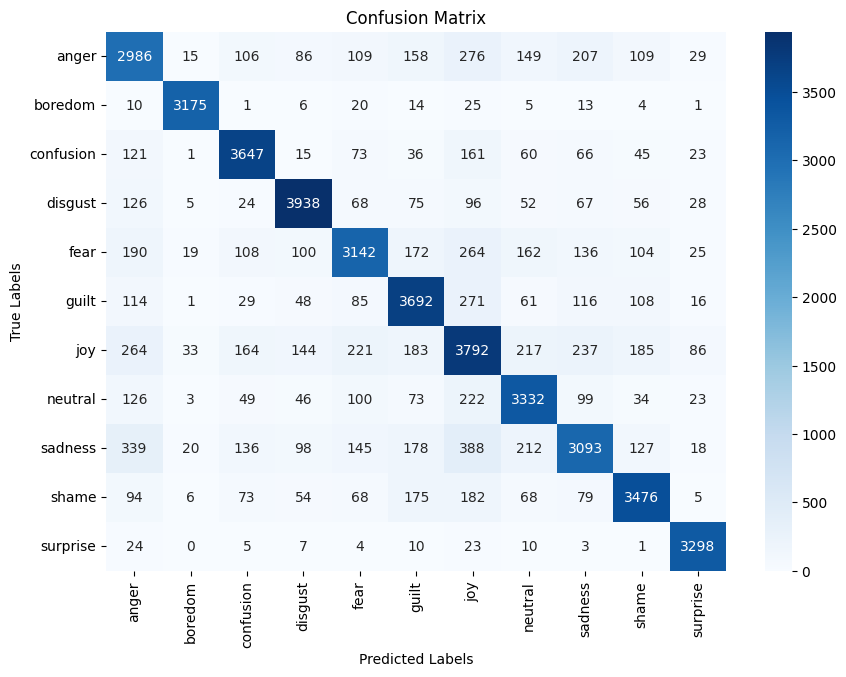

In [ ]:
from sklearn.metrics import confusion_matrix
# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix for the predictions.
    """
    cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Predict on test data and generate confusion matrix
y_test_pred = np.argmax(model.predict(X_test_padded), axis=1)  # Predicted class indices
y_test_true = np.argmax(y_test, axis=1)  # True class indices
labels = label_encoder.classes_  # Get class names from the label encoder
plot_confusion_matrix(y_test_true, y_test_pred, labels=labels)

# Number of epochs = 20

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2218/2218 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.1189 - loss: 2.6098 - val_accuracy: 0.2182 - val_loss: 2.2232
Epoch 2/20
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.2308 - loss: 2.1863 - val_accuracy: 0.3367 - val_loss: 1.9584
Epoch 3/20
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.3354 - loss: 1.9514 - val_accuracy: 0.3811 - val_loss: 1.8501
Epoch 4/20
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.3829 - loss: 1.8383 - val_accuracy: 0.4172 - val_loss: 1.7888
Epoch 5/20
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.4151 - loss: 1.7636 - val_accuracy: 0.4289 - val_loss: 1.7496
Epoch 6/20
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.4469 - loss: 1.6908 - val_accuracy: 0.4506 - val_loss: 1.7122
Epoch 7/20
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.4705 - loss: 1.6335 - val_accuracy: 0.4677 - val_loss: 1.6828
Epoch 8/20
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - accuracy: 0.4921 - loss: 1.58


Test Accuracy: 0.5745


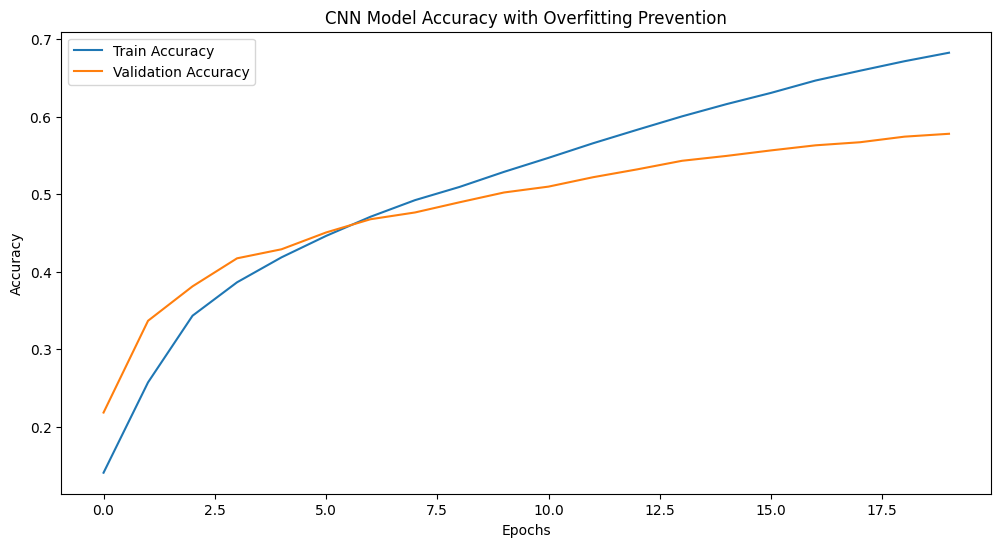

1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


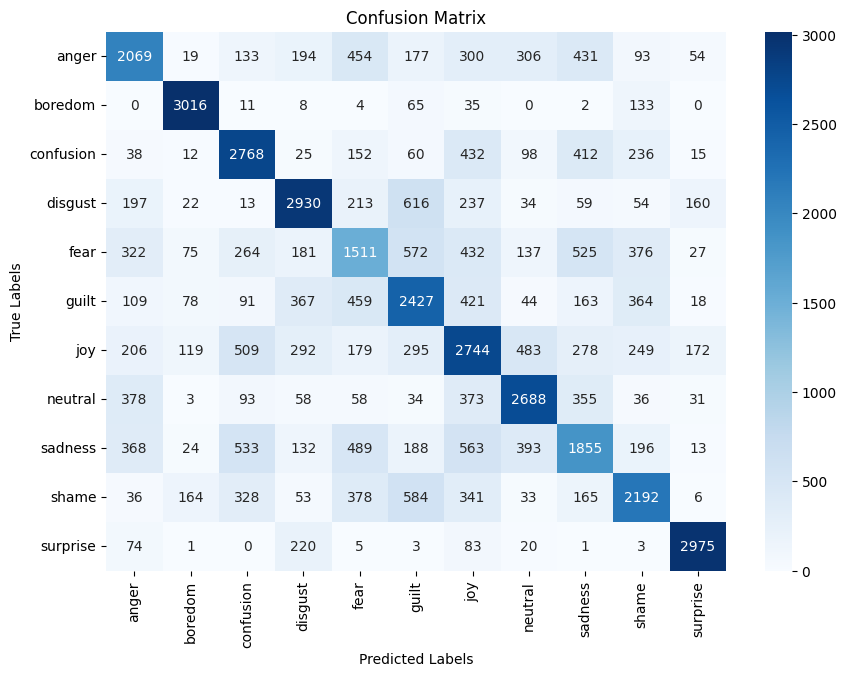

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the augmented dataset
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Split the dataset into features and labels
X = df['cleaned_text']
y = df['EMOTION']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert emotion labels to integers
y_categorical = to_categorical(y_encoded)  # One-hot encode the labels for multi-class classification

# Split into train, validation, and test sets (60%-20%-20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Vocabulary size of 10,000
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build the CNN model with regularization and dropout
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))  # Embedding layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01)))  # Regularization added
model.add(GlobalMaxPooling1D())  # Global Max Pooling layer
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Fully connected layer with regularization
model.add(Dropout(0.5))  # Increased dropout rate
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer for multi-class classification

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the CNN model with early stopping
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_val_padded, y_val),
    epochs=20,  # Increased max epochs with early stopping
    batch_size=64,  # Batch size
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Save the model
model.save('cnn_emotion_model_with_regularization.h5')  # Save the trained model

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy with Overfitting Prevention')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix for the predictions.
    """
    cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Predict on test data and generate confusion matrix
y_test_pred = np.argmax(model.predict(X_test_padded), axis=1)  # Predicted class indices
y_test_true = np.argmax(y_test, axis=1)  # True class indices
labels = label_encoder.classes_  # Get class names from the label encoder
plot_confusion_matrix(y_test_true, y_test_pred, labels=labels)


# Number of Epochs = 30

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2218/2218 ━━━━━━━━━━━━━━━━━━━━ 37s 16ms/step - accuracy: 0.1301 - loss: 2.5980 - val_accuracy: 0.2105 - val_loss: 2.1983
Epoch 2/30
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.2228 - loss: 2.1503 - val_accuracy: 0.2831 - val_loss: 2.0203
Epoch 3/30
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.2776 - loss: 2.0079 - val_accuracy: 0.3184 - val_loss: 1.9366
Epoch 4/30
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.3452 - loss: 1.8914 - val_accuracy: 0.4061 - val_loss: 1.8116
Epoch 5/30
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.4157 - loss: 1.7597 - val_accuracy: 0.4299 - val_loss: 1.7448
Epoch 6/30
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.4499 - loss: 1.6716 - val_accuracy: 0.4496 - val_loss: 1.6932
Epoch 7/30
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.4769 - loss: 1.6023 - val_accuracy: 0.4645 - val_loss: 1.6561
Epoch 8/30
2218/2218 ━━━━━━━━━━━━━━━━━━━━ 36s 16ms/step - accuracy: 0.5066 - loss: 1.53


Test Accuracy: 0.6031


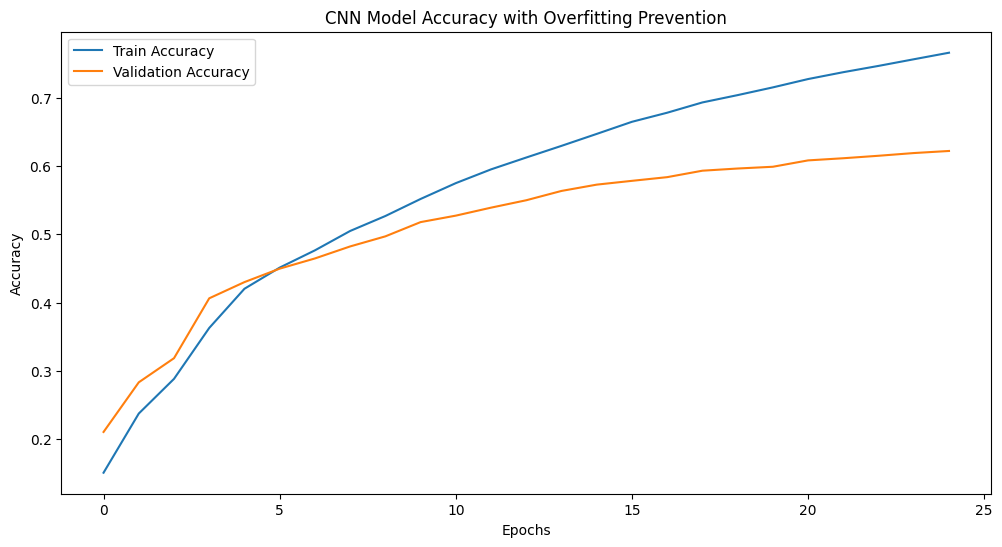

1479/1479 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


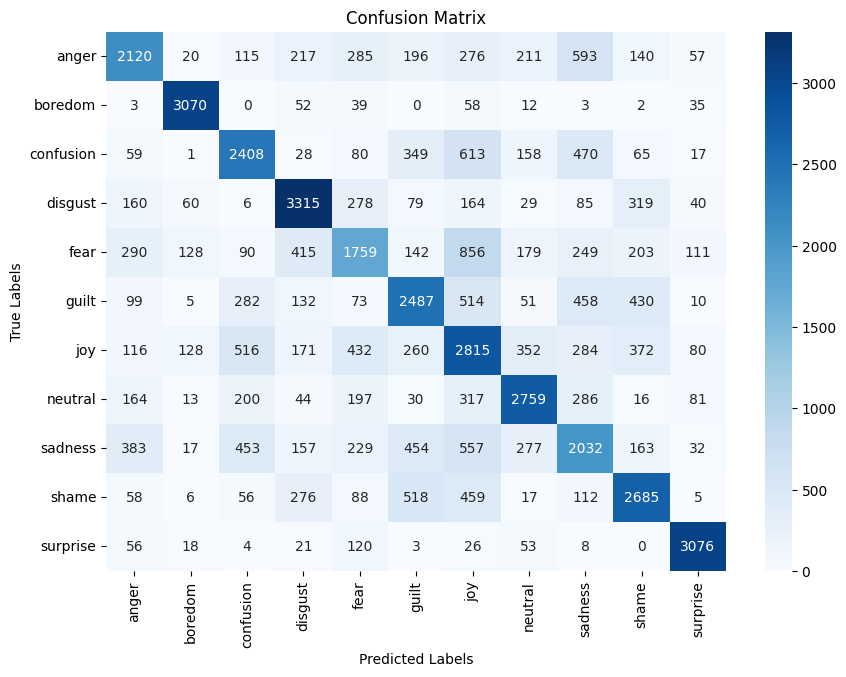

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the augmented dataset
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Split the dataset into features and labels
X = df['cleaned_text']
y = df['EMOTION']

# Encode the labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert emotion labels to integers
y_categorical = to_categorical(y_encoded)  # One-hot encode the labels for multi-class classification

# Split into train, validation, and test sets (60%-20%-20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y_categorical, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Vocabulary size of 10,000
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to ensure uniform input length
max_len = 100  # Maximum sequence length
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build the CNN model with regularization and dropout
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))  # Embedding layer
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', kernel_regularizer=l2(0.01)))  # Regularization added
model.add(GlobalMaxPooling1D())  # Global Max Pooling layer
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Fully connected layer with regularization
model.add(Dropout(0.5))  # Increased dropout rate
model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Output layer for multi-class classification

# Compile the model with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the CNN model with early stopping
history = model.fit(
    X_train_padded, y_train,
    validation_data=(X_val_padded, y_val),
    epochs=30,  # Increased max epochs with early stopping
    batch_size=64,  # Batch size
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test, verbose=1)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Save the model
model.save('cnn_emotion_model_with_regularization_30.h5')  # Save the trained model

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Model Accuracy with Overfitting Prevention')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    """
    Plots a confusion matrix for the predictions.
    """
    cm = confusion_matrix(y_true, y_pred, labels=range(len(labels)))
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Predict on test data and generate confusion matrix
y_test_pred = np.argmax(model.predict(X_test_padded), axis=1)  # Predicted class indices
y_test_true = np.argmax(y_test, axis=1)  # True class indices
labels = label_encoder.classes_  # Get class names from the label encoder
plot_confusion_matrix(y_test_true, y_test_pred, labels=labels)
